In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [2]:
df=pd.read_csv("Rainfall.csv")
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [3]:
df.shape

(366, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [5]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [6]:
# Removing extra spaces
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [8]:
df.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [9]:
# Removing the redundant info
df=df.drop(columns=['day'])
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [10]:
# Checking the missing values
print(df.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [11]:
df[["winddirection"]]

,winddirection
0,80.0
1,50.0
2,40.0
3,50.0
4,40.0
...,...
361,30.0
362,20.0
363,70.0
364,20.0


In [12]:
df.winddirection.unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [13]:
df.windspeed.unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [14]:
# Empty space filled with mode and median values
df['winddirection']=df['winddirection'].fillna(df.winddirection.mode()[0])
df['windspeed']=df['windspeed'].fillna(df.windspeed.median())

In [15]:
# There are no null values
print(df.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [16]:
df.rainfall.unique()

array(['yes', 'no'], dtype=object)

In [17]:
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [18]:
rainfall=pd.get_dummies(df['rainfall'],drop_first=True)
rainfall

,yes
0,True
1,True
2,True
3,True
4,True
...,...
361,True
362,True
363,True
364,True


In [19]:
df=pd.concat([df,rainfall],axis=1)
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,yes
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3,True
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3,True
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2,True
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9,True
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7,True
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4,True
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9,True
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4,True
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9,True


In [20]:
df['yes']=df['yes'].astype("int")
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,yes
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4,1
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9,1
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4,1
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9,1


In [21]:
df=df.drop(columns=['rainfall'])
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,yes
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,1


In [22]:
df.rename(columns={'yes':'rainfall'},inplace=True) # inplace=True means applies the changes
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,1
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,0.0,30.0,18.4,1
362,1026.6,18.6,17.3,16.3,12.8,75,85,1.0,20.0,25.9,1
363,1025.9,18.9,17.7,16.4,13.3,75,78,4.6,70.0,33.4,1
364,1025.3,19.2,17.3,15.2,13.3,78,86,1.2,20.0,20.9,1


Exploratory Data Analysis

In [23]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.284153,21.534153,0.680328
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.722827,10.056054,0.466988
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000,0.000000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.725000,0.000000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000,1.000000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.825000,1.000000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000,1.000000


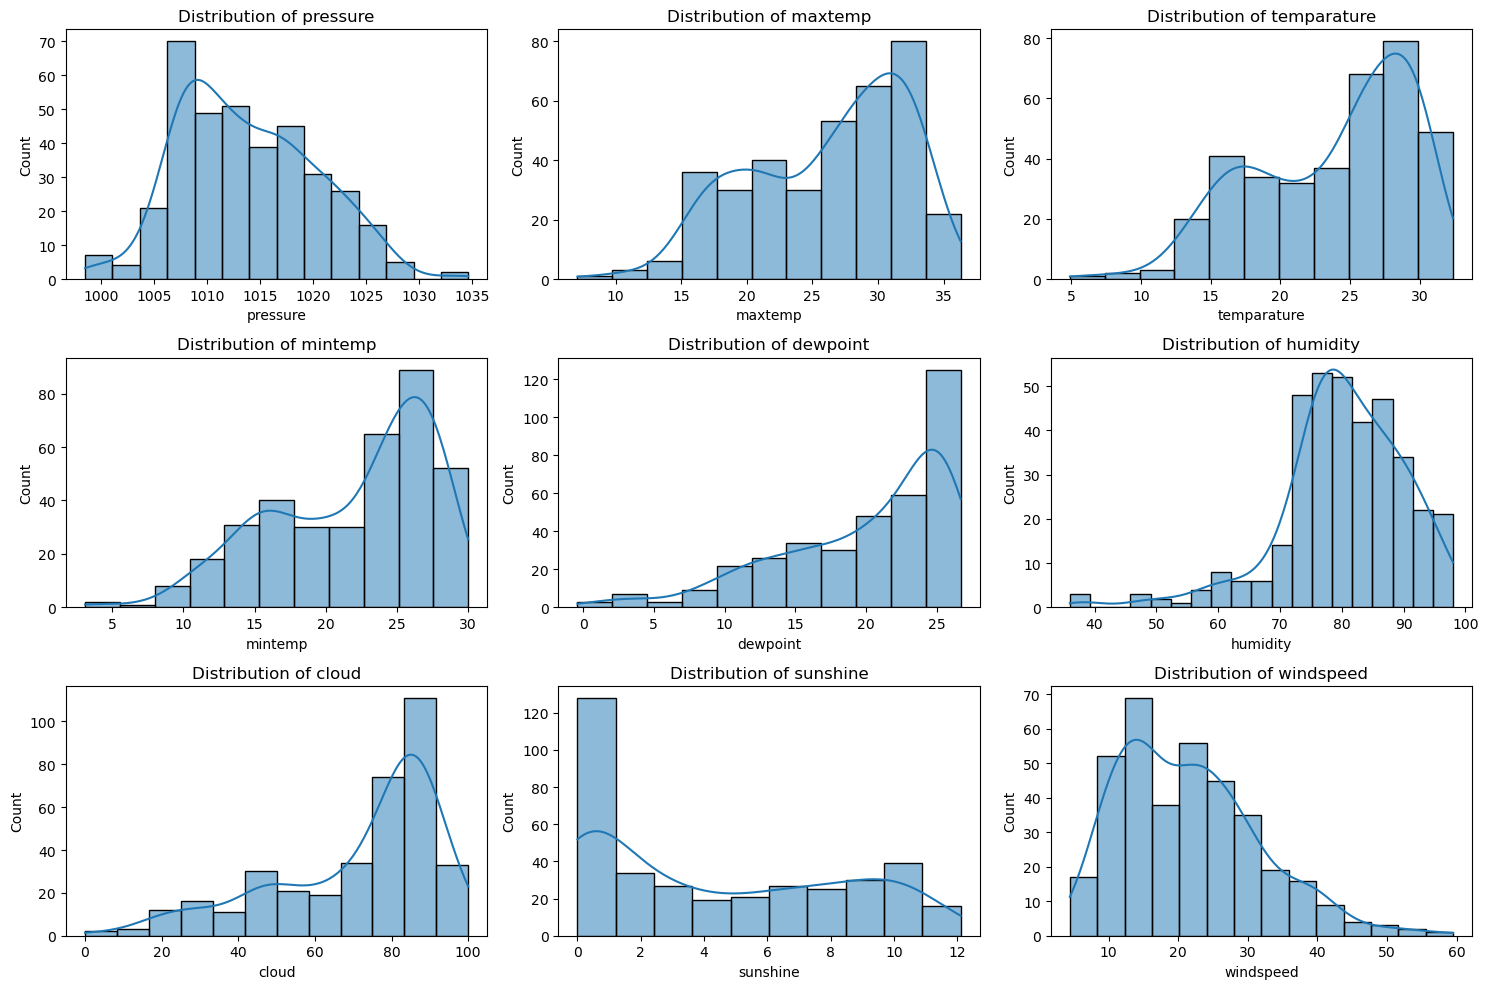

In [24]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

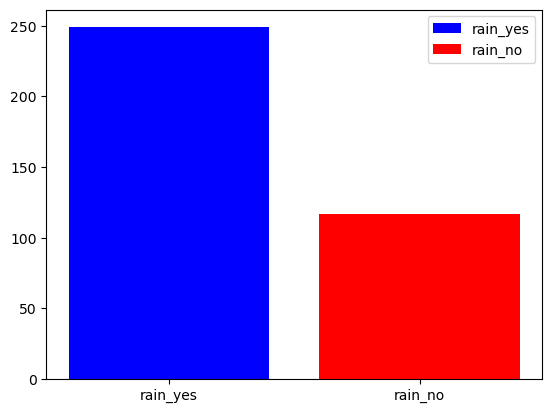

In [25]:
# Bar plot
rain_yes=len(df[df['rainfall']==1])
rain_no=len(df[df['rainfall']==0])
plt.bar(['rain_yes','rain_no'],[rain_yes,rain_no],color=['b','r'],label=['rain_yes','rain_no'])
plt.legend()
plt.show()

In [26]:
df.shape

(366, 11)

In [27]:
df.corr()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
pressure,1.000000,-0.829088,-0.851780,-0.839851,-0.860232,-0.274907,0.005621,-0.198171,-0.656828,0.373587,-0.089275
maxtemp,-0.829088,1.000000,0.986193,0.961534,0.899829,0.021882,-0.289765,0.507416,0.625447,-0.442095,-0.101003
temparature,-0.851780,0.986193,1.000000,0.990187,0.936866,0.092030,-0.205895,0.420545,0.645266,-0.393619,-0.037360
mintemp,-0.839851,0.961534,0.990187,1.000000,0.944515,0.139040,-0.156097,0.368288,0.629738,-0.359013,-0.007697
dewpoint,-0.860232,0.899829,0.936866,0.944515,1.000000,0.425282,0.044635,0.185234,0.623952,-0.378227,0.139916
humidity,-0.274907,0.021882,0.092030,0.139040,0.425282,1.000000,0.655493,-0.563579,0.099471,-0.076740,0.489623
cloud,0.005621,-0.289765,-0.205895,-0.156097,0.044635,0.655493,1.000000,-0.848334,-0.077037,0.258248,0.625766
sunshine,-0.198171,0.507416,0.420545,0.368288,0.185234,-0.563579,-0.848334,1.000000,0.251374,-0.298922,-0.552519
winddirection,-0.656828,0.625447,0.645266,0.629738,0.623952,0.099471,-0.077037,0.251374,1.000000,-0.219379,-0.015058
windspeed,0.373587,-0.442095,-0.393619,-0.359013,-0.378227,-0.076740,0.258248,-0.298922,-0.219379,1.000000,0.154193


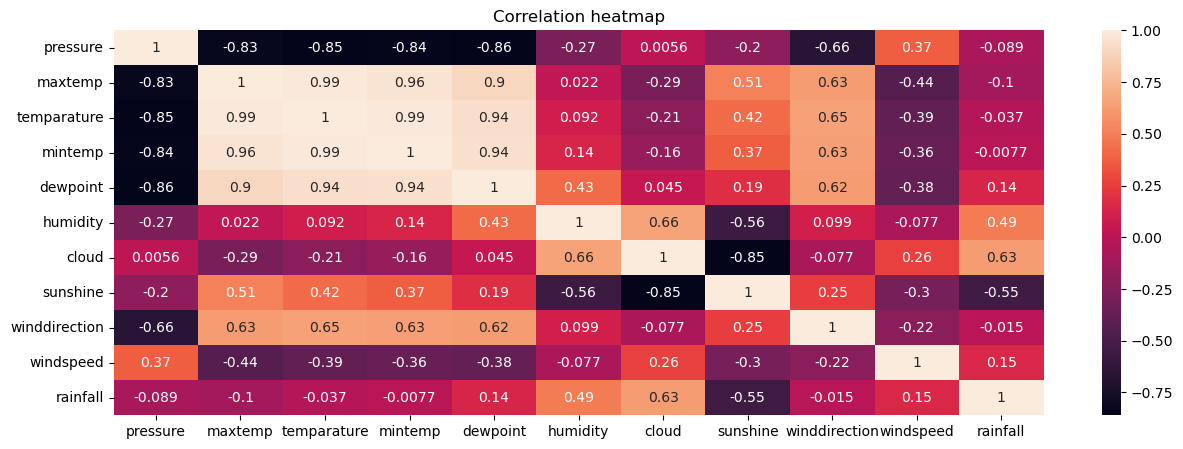

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation heatmap")
plt.show()

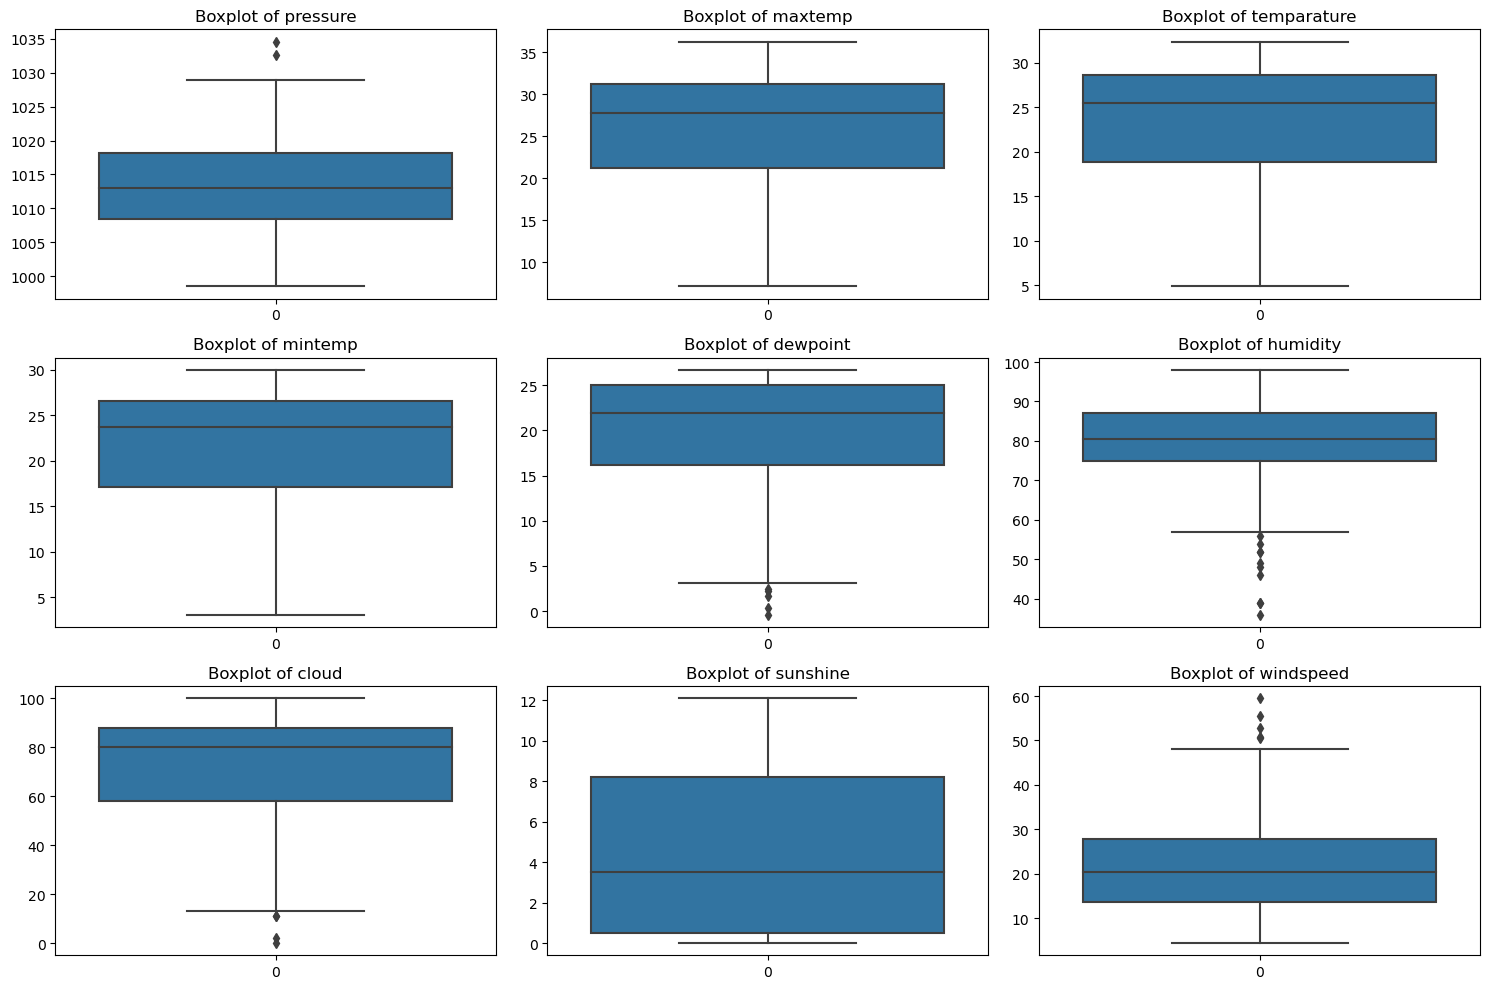

In [30]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.boxplot(df[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [33]:
# drop highly correlated column
data = df.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [34]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,1


In [35]:
print(data["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [36]:
# separate majority and minority class
df_majority = data[data["rainfall"] == 1]
df_minority = data[data["rainfall"] == 0]

In [37]:
# downsample majority class to match minority count
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [38]:
df_majority_downsampled.shape

(117, 8)

In [39]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [40]:
df_downsampled.shape

(234, 8)

In [42]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
188,1005.9,25.6,77,53,10.5,270.0,11.3,1
9,1017.5,15.5,85,91,0.0,70.0,37.7,1
137,1012.3,20.1,80,86,0.3,80.0,39.5,1
89,1018.3,16.3,79,89,2.4,40.0,14.8,1
157,1008.8,24.7,91,80,2.2,20.0,11.2,1


In [43]:
# shuffle the final dataframe
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [44]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1022.2,14.1,78,90,0.0,30.0,28.5,1
1,1013.4,19.5,69,17,10.5,70.0,12.4,0
2,1006.1,24.4,74,27,10.8,220.0,8.7,0
3,1007.6,24.8,85,84,1.8,70.0,34.8,1
4,1021.2,8.4,66,18,10.1,20.0,24.4,0


In [45]:
df_downsampled["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [46]:
# split features and target as X and y
X = df_downsampled.drop(columns=["rainfall"])
y = df_downsampled["rainfall"]

In [47]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2      14.1        78     90       0.0           30.0       28.5
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1007.6      24.8        85     84       1.8           70.0       34.8
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.1      25.4        86     75       5.7           20.0        9.5
230    1010.1      19.9        91     89       0.0           70.0       31.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1005.0      26.1        87     82       2.2          160.0       12.6

[234 rows x 7 columns]


In [48]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int32


In [49]:
# splitting the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [50]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [51]:
# Hypertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [52]:
best_rf_model = grid_search_rf.best_estimator_

print("best parameters for Random Forest:", grid_search_rf.best_params_)

best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [53]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean cross-validation score: 0.818918918918919


In [54]:
# test set performance
y_pred = best_rf_model.predict(X_test)

print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set Accuracy: 0.7446808510638298
Test set Confusion Matrix:
 [[17  7]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [55]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

In [56]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [57]:
prediction = best_rf_model.predict(input_df)

In [59]:
print(prediction[0])

1


In [60]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
model=log_reg.fit(X_train,y_train)

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

In [67]:
def impressions(model,accuracy):
    print('Accuracy: {} %'.format(accuracy))
    print('Mean squared error: ', round(mean_squared_error(y_test,y_pred),3))
    cm=confusion_matrix(y_test,y_pred)
    class_label = [0, 1]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


Accuracy: 74.468 %
Mean squared error:  0.255


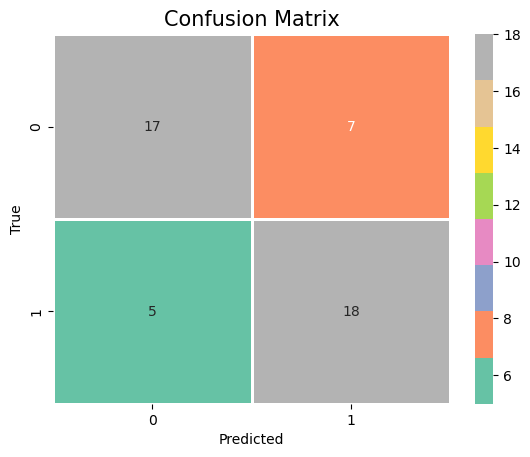

In [76]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=8)
KNN.fit(X_train,y_train)
Y_pred = KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(y_test,y_pred), 5)*100 # Accuracy

impressions(KNN,KNN_accuracy)

Y_score = KNN.predict_proba(X_test)[:,1]
# roc_curve(y_test,Y_score)